In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import hickle as hkl
from torch.nn import Softmax

from InflGame.utils.general import *
import InflGame.domains.rd as rd
from InflGame.utils.data_management import *



from InflGame.MARL.utils.bifurcations import experiment_optimized as bifurcation_experiment_optimized

from InflGame.MARL.MARL_plots import *
from InflGame.MARL.sync_game import influencer_env_sync
from InflGame.MARL.IQL_sync import IQL_sync
from InflGame.MARL.utils.IQL_utils import *
from InflGame.MARL.utils.MARL_utils import *
from InflGame.MARL.utils.my_parse import add_rl_example_script_args


from InflGame.MARL.utils.experiments import run_experiment


In [2]:
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#actual resource distribution

bin_points=np.linspace(.001, .999, 100)
resource_distribution2=rd.resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

In [12]:
parser = add_rl_example_script_args(default_reward=1, default_iters=50, default_timesteps=100000)
parser.set_defaults(
    enable_new_api_stack=True,
    resource_distribution=resource_distribution2,
)
R=0.1
cshift=np.exp(-1/2*(bin_points-0)**2/R**2)+np.exp(-1/2*(bin_points-1)**2/R**2)


args=parser.parse_args(args=[])
env_config_main={"num_agents": 8,"initial_position":np.array([.1,.2,.3,.4,.6,.7,.8,.9]) ,"bin_points":args.bin_points,"resource_distribution":args.resource_distribution,
                 "step_size":.1,"infl_configs":args.infl_configs,"parameters":np.array([1,1,1,1,1,1,1,1]),"domain_type":args.domain_type,
                 "domain_bounds":args.domain_bounds,"fixed_pa":args.fixed_pa,"infl_cshift":False,"cshift":cshift,"infl_fshift":False,"Q":0,
                 "NUM_ITERS":100,"precalculate_reward":False,"normalize_reward":False}

In [13]:
episode_configs={"TYPE":"fixed","episode_max":4000,"episode_min":10}
temperature_configs={"TYPE":"fixed","temperature":0.5}
epsilon_configs={"TYPE":"fixed","epsilon":0.1}


In [14]:
results = bifurcation_experiment_optimized(
   env_configs=env_config_main,
    trials=500,
    gamma=.5,
    alpha=.05,
    epochs=0,
    random_seed=0,
    random_initialization=False,
    smoothing=False,
    temperature_configs=temperature_configs,
    epsilon_configs=epsilon_configs,
    episode_configs=episode_configs,
    resource_name="gauss_mix_2m",
    name_ads=["test"],
    checkpoints=False,
    save_positions=True,
    algo_epoch=False,
    params=np.linspace(0.03, .3, 96),
    n_processes=16, 
    batch_size=3,  # Process x parameters per worker
    use_progress_bar=True
)

Running experiment with 16 processes, batch size 3...
Processing 96 parameters in 32 batches


Processing batches:   0%|          | 0/32 [00:00<?, ?it/s]

Processing batches: 100%|██████████| 32/32 [44:42<00:00, 83.84s/it]    


Saving results...
Completed processing 96 parameters in 2683.89 seconds
Average time per parameter: 27.957 seconds


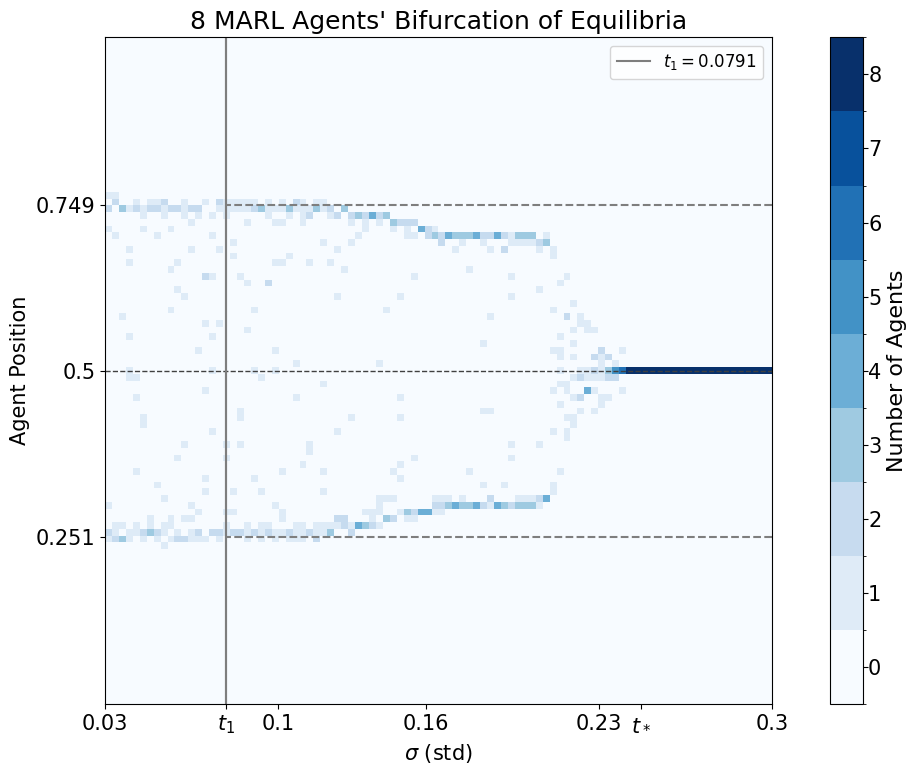

In [16]:
from InflGame.MARL.MARL_plots import bifurcation_over_parameters
bifurcation_over_parameters(positions=results[0],reach_parameters=np.linspace(0.03, .3, 96),num_agents=8,bin_points=bin_points,resource_distribution=resource_distribution2,refinements=10,plot_type="heat",infl_cshift=False,infl_type='gaussian',
                            font={'default_size': 15, 'cbar_size': 16, 'title_size': 18, 'legend_size': 12, 'font_family': 'sans-serif'},
                            cbar_config={'center_labels': True, 'label_alignment': 'center', 'shrink': 1.0})